In [1]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
print('rows : ',df.shape[0])
print('Columns : ',df.shape[1])

rows :  1338
Columns :  7


In [5]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.columns
print('data frame cloumns :',df.columns)

data frame cloumns : Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [8]:
for i in df.columns:
    print("=="*20)
    print(i)
    print("=="*20)
    print(df[i].value_counts())

age
18    69
19    68
20    29
51    29
45    29
46    29
47    29
48    29
50    29
52    29
28    28
54    28
21    28
27    28
26    28
49    28
25    28
24    28
23    28
22    28
53    28
42    27
44    27
43    27
41    27
40    27
31    27
30    27
29    27
56    26
34    26
33    26
32    26
57    26
55    26
35    25
59    25
58    25
36    25
39    25
38    25
37    25
60    23
61    23
62    23
63    23
64    22
Name: age, dtype: int64
sex
male      676
female    662
Name: sex, dtype: int64
bmi
32.300    13
28.310     9
30.800     8
34.100     8
28.880     8
          ..
44.745     1
26.070     1
27.300     1
37.715     1
29.200     1
Name: bmi, Length: 548, dtype: int64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
smoker
no     1064
yes     274
Name: smoker, dtype: int64
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
charges
1639.56310     2
11987.16820    1
7624.63000     

          Total  Percent
age           0      0.0
sex           0      0.0
bmi           0      0.0
children      0      0.0
smoker        0      0.0
region        0      0.0
charges       0      0.0


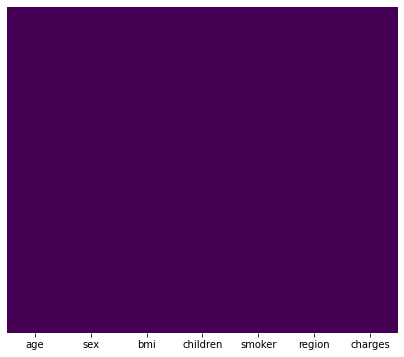

In [9]:
# to find th null data
fig=plt.figure(figsize=(7,6))
total=df.isnull().sum().sort_values(ascending=False)
percentage=(df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percentage], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(20))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
X=df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y=df['charges']

In [10]:
### To find how many Labels found in each and every cloumn
for feature in df.columns[:]:
    if df[feature].dtypes=="object":
        print(feature,":",len(df[feature].unique()),'labels')
lb=LabelEncoder()
#used label Encoding
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=lb.fit_transform(df[i])
df.head(5)

sex : 2 labels
smoker : 2 labels
region : 4 labels


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


##### Outlier analization
#outliers
https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/
#### If Features Are Skewed We Use the IRQ Technique
#### If Features Are in normal distribution we use the  z- score method

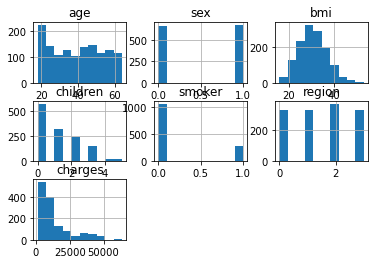

In [11]:
df.hist()
plt.show()

In [36]:
#X=df.iloc[:,:-1]
#y=df.iloc[:,-1]
#data = df.values[:, :-1]
X=df[['age', 'bmi', 'children', 'smoker', 'region']]
X_columns=X.columns
y=df['charges']
type(X)


pandas.core.frame.DataFrame

<AxesSubplot:>

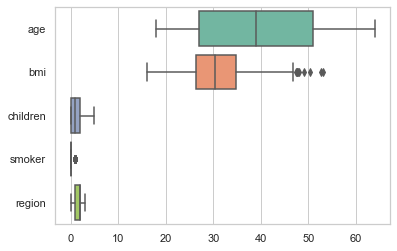

In [37]:
# Can do entire dataframe with orient='h'
#sns.boxplot(data=X,palette='rainbow')#orient='h')#palette="coolwarm")#hue="smoker"
sns.boxplot(data=X, orient="h", palette="Set2")

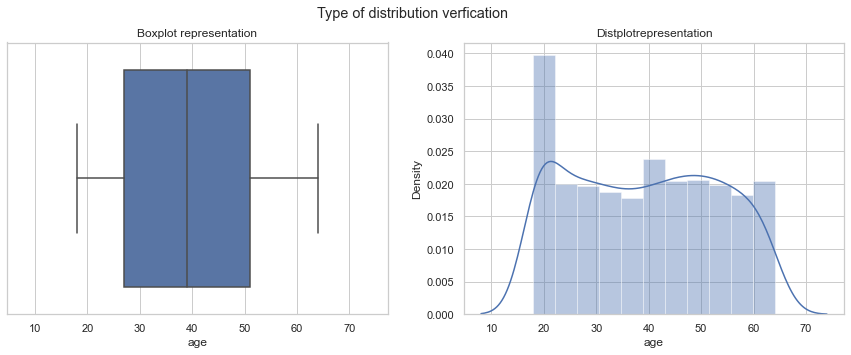

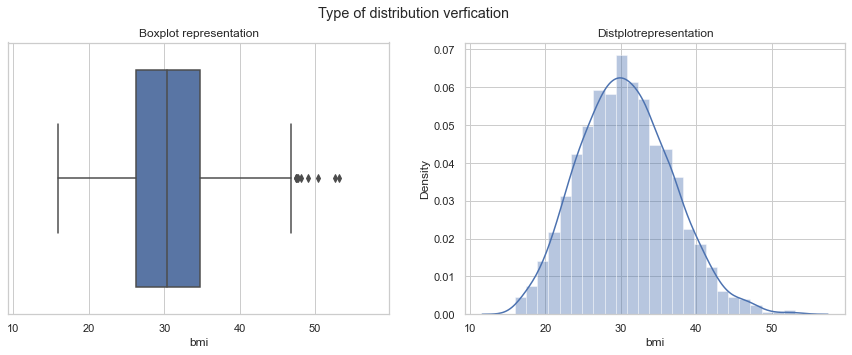

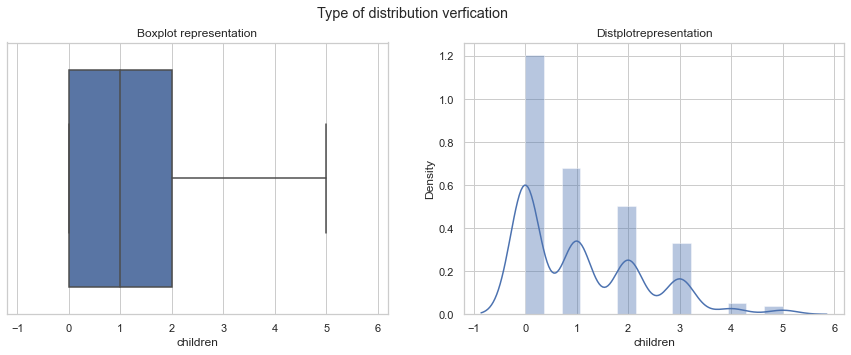

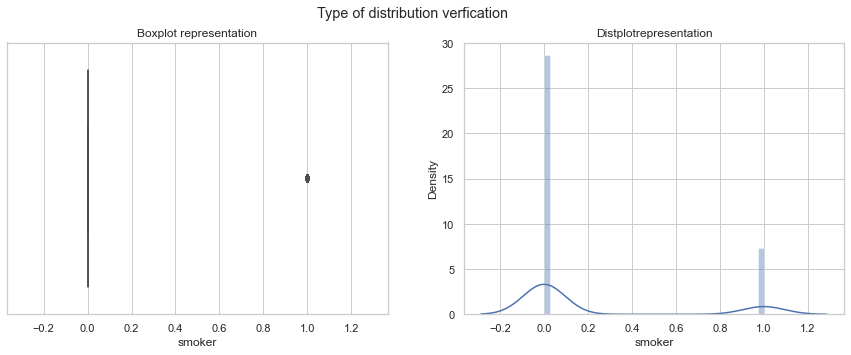

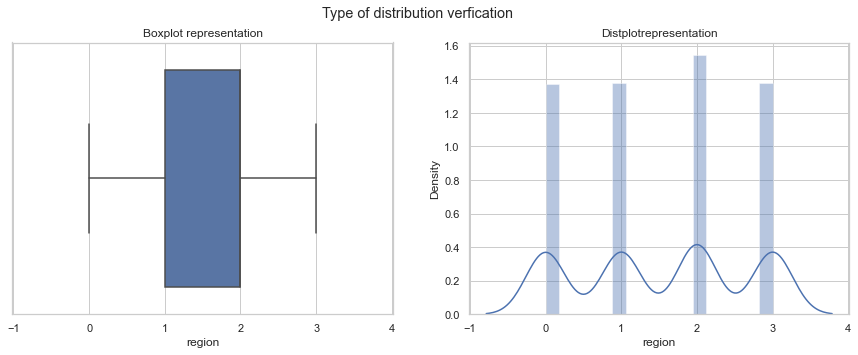

In [38]:
for i in X:
    fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
    fig.suptitle('Type of distribution verfication')
    axes[0].set_title('Boxplot representation')
    axes[1].set_title('Distplotrepresentation')
    sns.set_theme(style="whitegrid")
    sns.boxplot(X[i],ax=axes[0])
    sns.distplot(X[i],ax=axes[1])
    plt.show()

      age    bmi  children  smoker  region
116    58  49.06         0       0       2
286    46  48.07         2       0       0
401    47  47.52         1       0       2
543    54  47.41         0       1       2
847    23  50.38         1       0       2
860    37  47.60         2       1       3
1047   22  52.58         1       1       2
1088   52  47.74         1       0       2
1317   18  53.13         0       0       2
Empty DataFrame
Columns: [age, bmi, children, smoker, region]
Index: []
Empty DataFrame
Columns: [age, bmi, children, smoker, region]
Index: []
Empty DataFrame
Columns: [age, bmi, children, smoker, region]
Index: []


<AxesSubplot:title={'center':'Distplotrepresentation'}, xlabel='bmi', ylabel='Density'>

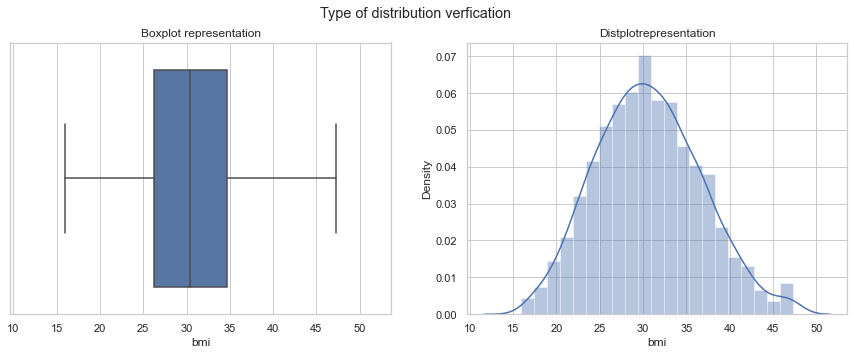

In [39]:
# outlier in Bmi feature i used IRQ method 
min_thresold, max_thresold = X.bmi.quantile([0.25, 0.75])
percentile25 = X['bmi'].quantile(0.25)
percentile75 = X['bmi'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print(X[X['bmi'] > upper_limit])
print(X[X['bmi'] < lower_limit])
#i am replacing the  outliers
X['bmi'] = np.where(X['bmi'] > upper_limit,upper_limit,X['bmi'])
X['bmi'] = np.where(X['bmi'] < lower_limit,lower_limit,X['bmi'])
############################
print(X[X['bmi'] > upper_limit])
print(X[X['bmi'] < lower_limit])
###########################
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))
fig.suptitle('Type of distribution verfication')
axes[0].set_title('Boxplot representation')
axes[1].set_title('Distplotrepresentation')
sns.set_theme(style="whitegrid")
sns.boxplot(X['bmi'],ax=axes[0])
sns.distplot(X['bmi'],ax=axes[1])


In [40]:
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

In [41]:
from sklearn.model_selection import train_test_split
#X_train_test, X_validation, y_train_test, y_validation = train_test_split(X_std, y, test_size=0.05, random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.20, random_state=101)
print(X_test.shape)
print(y_test.shape)

(268, 5)
(268,)


In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LinearRegression()
# evaluate model
scores = cross_val_score(model, X_std, y,cv=cv, n_jobs=-1,scoring='r2') # scoring='accuracy' for classification method
print(scores)
scores.mean()

[0.72892766 0.79517636 0.69027807 0.72036113 0.76056507 0.71946578
 0.74064487 0.77313248 0.70602637 0.81457392]


0.7449151713613373

In [44]:
model.fit(X_std,y)
y_predicted  = model.predict(X_test)
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_predicted)
print(r2)

0.7668895412102443


In [45]:
df_analize = pd.DataFrame({'Actual': y_test, 'Predicted': y_predicted})
df_analize

,Actual,Predicted
44,6079.67150,10720.541126
134,2457.21115,2848.423205
980,25517.11363,10949.151707
618,34439.85590,27142.396796
1238,6985.50695,6611.239680
...,...,...
648,1712.22700,2238.946781
1023,1711.02680,271.370430
28,2775.19215,-77.702111
798,11848.14100,12996.389502


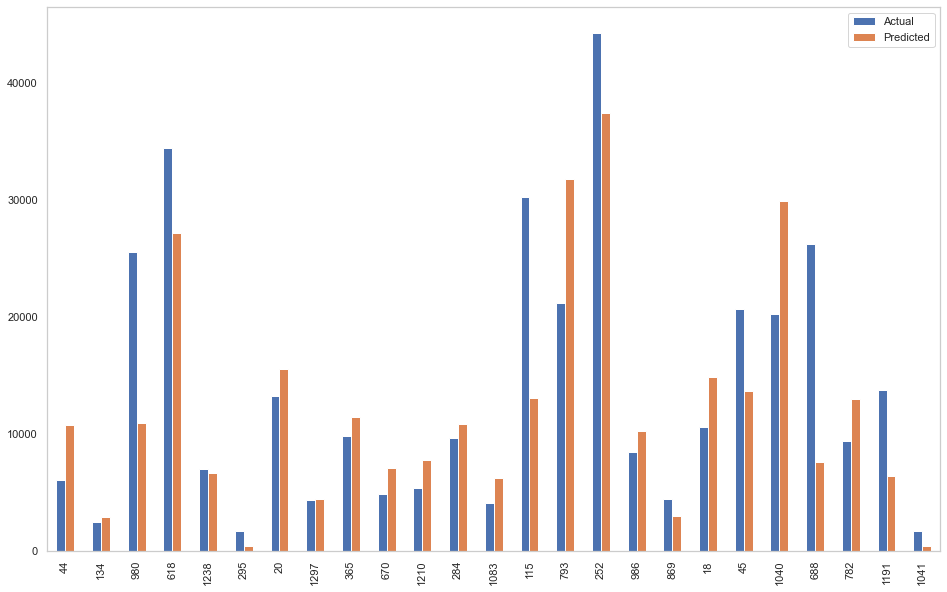

In [46]:
Temp_df = df_analize.head(25)
Temp_df.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

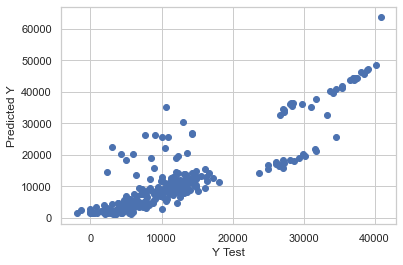

In [47]:
plt.scatter(y_predicted,y_test)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

plt.show()


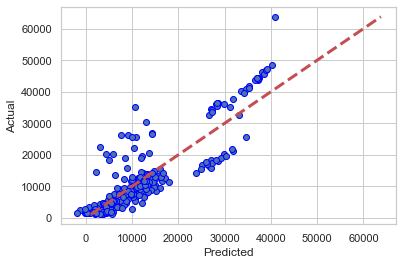

In [48]:
fig, ax = plt.subplots()
ax.scatter(y_predicted, y_test, edgecolors=(0, 0, 1))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=3)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [49]:
coeffecients = pd.DataFrame(model.coef_,X_columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
age,3609.391889
bmi,2028.639487
children,574.831075
smoker,9608.715532
region,-391.544964


In [50]:
model.intercept_

13270.422265141258

In [51]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [57]:
try:
    listii=[]
    while True:
        listii.append(float(input()))
except:
    print(listii)

19
27
0
1
3

[19.0, 27.0, 0.0, 1.0, 3.0]


In [58]:
arr = np.array(listii)
newarr = arr.reshape(1, len(X_columns))
new_output = model.predict(newarr)
print(new_output)

[145056.21494673]


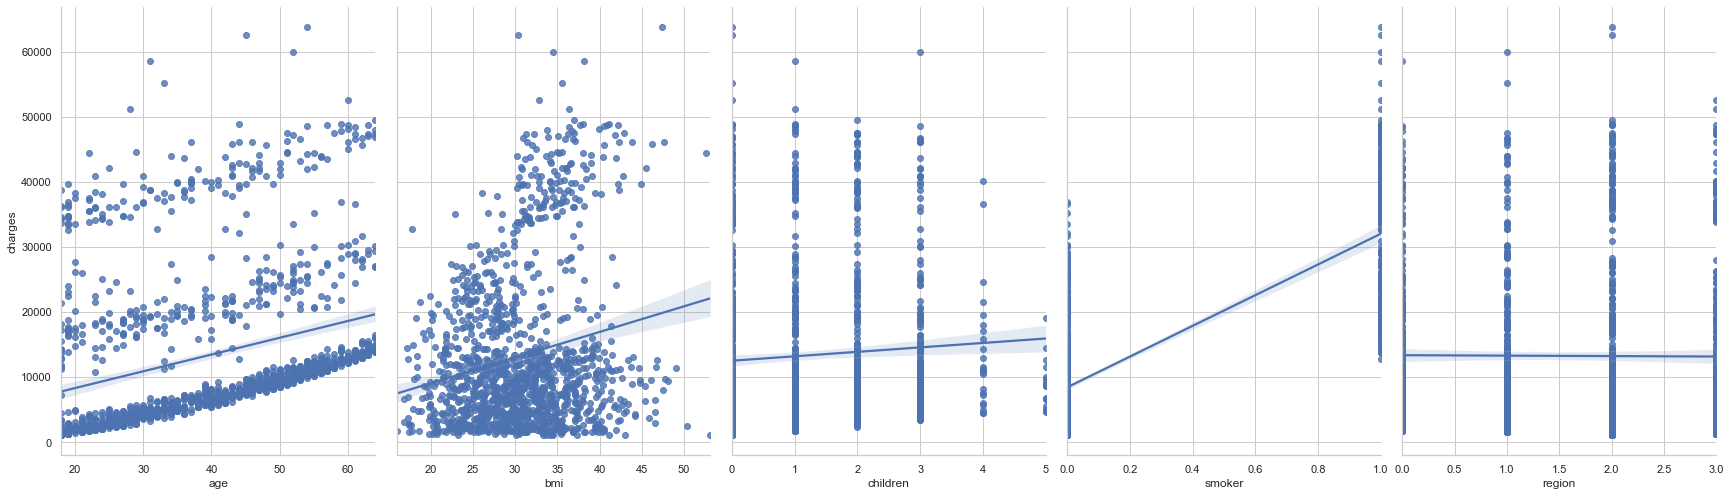

In [59]:
sns.pairplot(df, x_vars=X_columns, y_vars='charges', size=7, aspect=0.7, kind='reg')

In [60]:
### STATSMODELS ###
import statsmodels.api as sm

X = sm.add_constant(X)
## fit a OLS model for analyzation
model= sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     802.7
Date:                Mon, 02 Aug 2021   Prob (F-statistic):               0.00
Time:                        14:34:16   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.714e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.194e+04    949.148    -12.575      0.000   -1.38e+04   -1.01e+04
age          256.9930     11.879     21.634      0.000     233.689     280.297
bmi          335.0541     27.873     12.021      0.000     280.374     389.735
children     477.0215    137.553      3.468      0.001     207.178     746.865
smoker      2.381e+04    410.457     58.011      0.000     2.3e+04    2.46e+04
region      -354.5087    151.853     -2.335      0.020    -652.406     -56.611
==============================================================================
Omnibus:                      299.922   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              716.562
Skew:                           1.210   Prob(JB):                    2.51e-156
Kurtosis:                       5.645   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""